In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/DenverCrimesData.csv')

df = df.drop(columns=["OBJECTID", "GEO_X", "GEO_Y"])

df["FIRST_OCCURRENCE_DATE"] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'])
df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(df['LAST_OCCURRENCE_DATE'])
df["REPORTED_DATE"] = pd.to_datetime(df['REPORTED_DATE'])

df['YEAR'] = df["FIRST_OCCURRENCE_DATE"].dt.year
df['MONTH'] = df["FIRST_OCCURRENCE_DATE"].dt.month
df['DAY_OF_WEEK'] = df["FIRST_OCCURRENCE_DATE"].dt.day_of_week
df['HOUR'] = df['FIRST_OCCURRENCE_DATE'].dt.hour

df['NEIGHBORHOOD_CLEAN'] = df['NEIGHBORHOOD_ID'].str.replace('-', ' ').str.title()

/var/folders/mk/ykv3j_d10z7fbbylyxfw79ym0000gn/T/ipykernel_55124/321136347.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(df['LAST_OCCURRENCE_DATE'])


## Crimes by Year

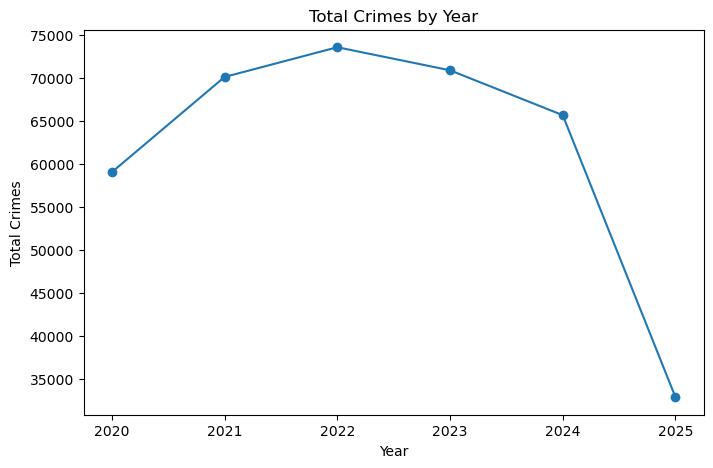

In [4]:
plt.figure(figsize=(8,5))

df.groupby("YEAR").size().sort_index().plot(kind='line', marker="o", title="Total Crimes by Year")

plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.xticks(df['YEAR'].sort_values().unique())
plt.show()

## Crimes by Month

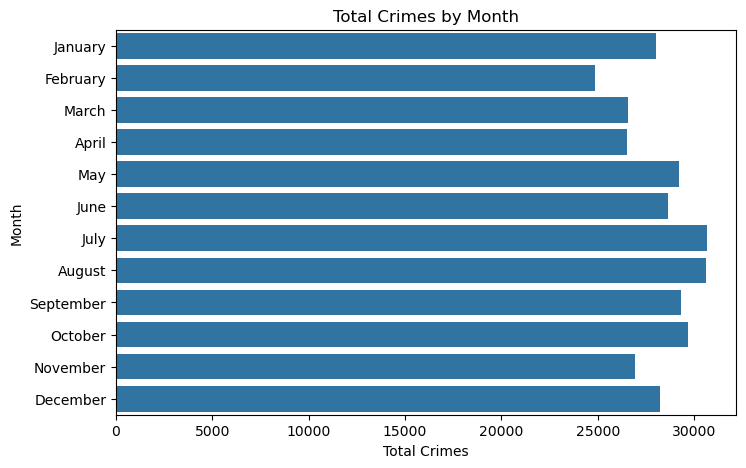

In [5]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_df = df[df['YEAR'].between(2020, 2024)].groupby("MONTH").size().reset_index(name="COUNT").sort_values("MONTH")
month_df['MONTH'] = month_order

plt.figure(figsize=(8, 5))

sns.barplot(data=month_df, x="COUNT", y="MONTH")

plt.title("Total Crimes by Month")
plt.xlabel("Total Crimes")
plt.ylabel("Month")
plt.show()

## Crimes by Day of the Week

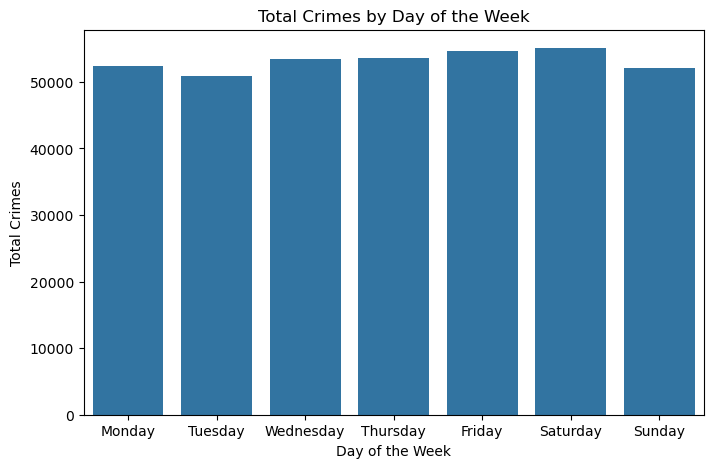

In [6]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_of_week_df = df.groupby("DAY_OF_WEEK").size().reset_index(name="COUNT").sort_values('DAY_OF_WEEK')
day_of_week_df['DAY_OF_WEEK'] = day_order

plt.figure(figsize=(8, 5))

sns.barplot(data=day_of_week_df, x="DAY_OF_WEEK", y="COUNT")

plt.title("Total Crimes by Day of the Week")
plt.xlabel('Day of the Week')
plt.xticks(df['DAY_OF_WEEK'].sort_values().unique())
plt.ylabel('Total Crimes')
plt.show()

## Crimes by Neighborhoods and Census Data

In [7]:
census_df = pd.read_csv('../data/DenverCensus2010.csv')
neighborhoods_df = df.merge(census_df, left_on="NEIGHBORHOOD_CLEAN", right_on="NAME", how="inner")
neighborhoods_df

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,SUM_Rented_Age_25_to_34,SUM_Rented_Age_35_to_44,SUM_Rented_Age_45_to_54,SUM_Rented_Age_55_to_59,SUM_Rented_Age_60_to_64,SUM_Rented_Age_65_to_74,SUM_Rented_Age_75_to_84,SUM_Rented_Age_85_Plus,Shape__Area,Shape__Length
0,DP20256007497,DP20256007497230800,2308,0,theft-from-bldg,larceny,2025-05-24 06:55:00,2025-05-23 23:59:00,2025-05-24 11:32:00,3403 N BRIGHTON BLVD,...,1992,679,479,199,154,175,91,29,4.924220e+07,33172.464966
1,DP2025254525,DP2025254525239901,2399,1,theft-bicycle,larceny,2025-05-20 00:00:00,2025-05-19 18:00:00,2025-05-20 22:46:00,1719 E 19TH AVE,...,608,253,211,133,107,190,84,25,1.468877e+07,15694.411580
2,DP20256007167,DP20256007167230800,2308,0,theft-from-bldg,larceny,2025-05-02 02:25:00,2025-05-17 19:25:00,2025-05-18 02:37:00,2800 BLK N VALLEJO ST,...,926,412,256,91,70,80,91,129,3.214044e+07,23553.957043
3,DP20246001097,DP20246001097230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2024-01-25 04:09:00,2024-01-25 10:00:00,2024-01-25 17:06:00,1300 E COLFAX AVE,...,1476,660,468,211,210,185,129,56,1.468285e+07,15276.343646
4,DP20246005462,DP20246005462299901,2999,1,criminal-mischief-mtr-veh,public-disorder,2024-05-03 06:00:00,2024-05-03 08:15:00,2024-05-04 02:03:00,1500 BLK N RALEIGH ST,...,652,501,436,160,166,297,176,65,2.798366e+07,24977.017700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306107,DP2025303000,DP2025303000240400,2404,0,theft-of-motor-vehicle,auto-theft,2025-06-05 21:00:00,NaT,2025-06-13 04:22:00,00 BLK S ALCOTT ST,...,173,142,110,47,39,58,13,10,2.676609e+07,22063.817310
306108,DP2025302676,DP2025302676359900,3599,0,drug-pcs-other-drug,drug-alcohol,2025-06-13 01:09:00,NaT,2025-06-13 01:13:00,1396 S ALCOTT ST,...,330,294,294,147,128,223,100,28,4.047663e+07,27363.123425
306109,DP2025302673,DP2025302673131300,1313,0,assault-simple,other-crimes-against-persons,2025-06-13 00:00:00,NaT,2025-06-13 00:05:00,W 1ST AVE / N HAZEL CT,...,225,220,140,55,36,31,15,4,2.150788e+07,18715.219783
306110,DP2025301582,DP2025301582240400,2404,0,theft-of-motor-vehicle,auto-theft,2025-06-12 15:00:00,NaT,2025-06-12 15:41:00,3300 BLK N MADISON ST,...,204,130,123,46,29,43,23,9,2.148678e+07,18648.793314


In [8]:
grouped = neighborhoods_df[neighborhoods_df['YEAR'] == 2024].groupby("NEIGHBORHOOD_CLEAN").agg({
  "INCIDENT_ID": "count",
  "SUM_POPULATION_2010": "first"
})

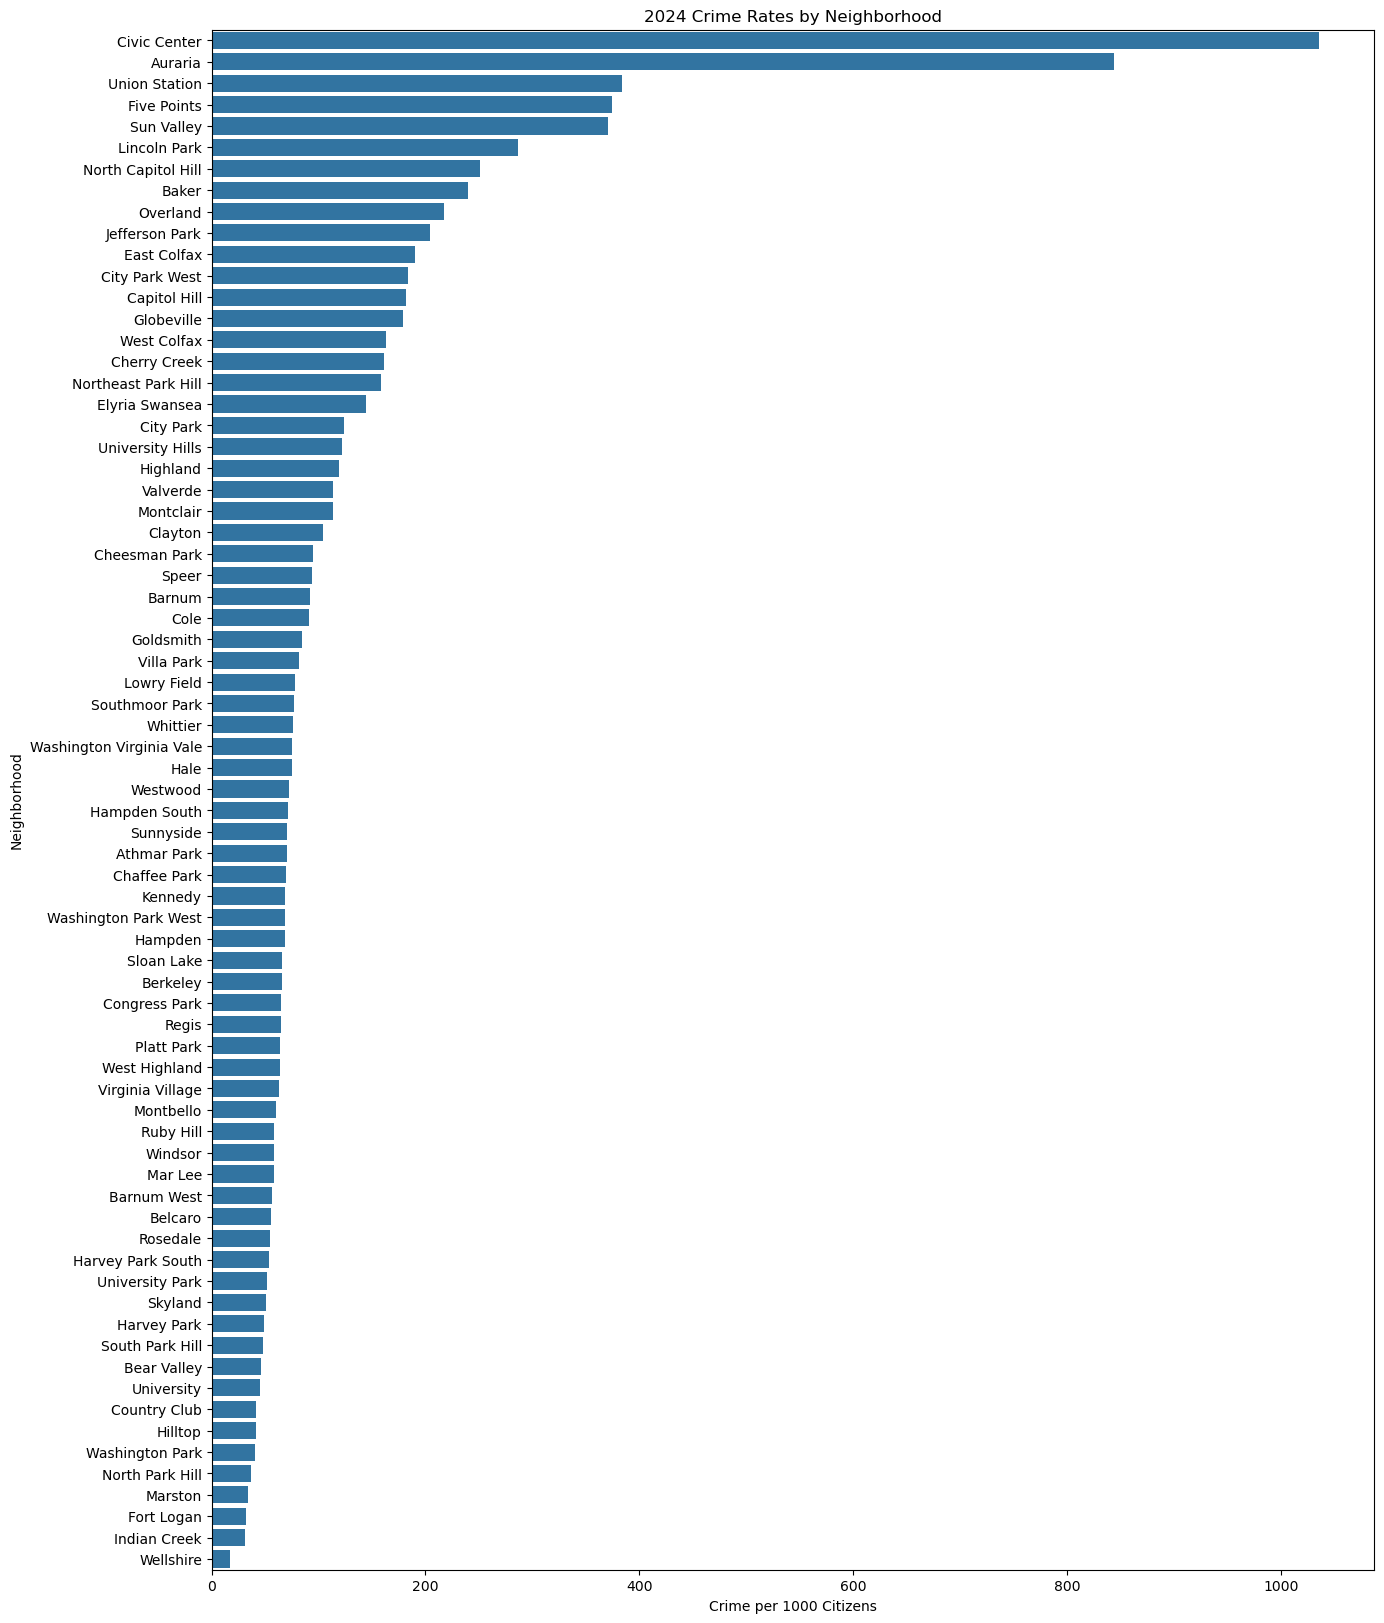

In [9]:
grouped['2024_CRIME_RATE'] = grouped['INCIDENT_ID'] / grouped['SUM_POPULATION_2010'] * 1000

crime_rate_by_neighborhood = grouped['2024_CRIME_RATE'].sort_values(ascending=False).reset_index(name="COUNT")

plt.figure(figsize=(15, 20))
sns.barplot(data=crime_rate_by_neighborhood, y="NEIGHBORHOOD_CLEAN", x="COUNT")
plt.title("2024 Crime Rates by Neighborhood")
plt.ylabel("Neighborhood")
plt.xlabel("Crime per 1000 Citizens")
plt.show()

## Effect of Weather on Crime Rates

In [10]:
## weather_1 = pd.read_csv("../data/old/Weather-2020-2021.csv")
## weather_2 = pd.read_csv("../data/old/Weather-2022-2023.csv")
## weather_3 = pd.read_csv("../data/old/Weather-2024-2025.csv")

## weather = pd.concat([weather_1, weather_2, weather_3], axis=0)
## weather.to_csv("../data/Weather.csv")

In [11]:
weather_df = pd.read_csv("../data/Weather.csv", parse_dates=['datetime'])
weather_df = weather_df[['datetime', 'tempmax', 'tempmin', 'precip', 'conditions', 'snow', 'snowdepth']]

In [12]:
df['DATE'] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE']).dt.date
weather_df['DATE'] = pd.to_datetime(weather_df['datetime']).dt.date
merged_df = df.merge(weather_df, on="DATE", how="left")

In [13]:
merged_df

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,HOUR,NEIGHBORHOOD_CLEAN,DATE,datetime,tempmax,tempmin,precip,conditions,snow,snowdepth
0,DP20256007497,DP20256007497230800,2308,0,theft-from-bldg,larceny,2025-05-24 06:55:00,2025-05-23 23:59:00,2025-05-24 11:32:00,3403 N BRIGHTON BLVD,...,6,Five Points,2025-05-24,2025-05-24,67.5,51.1,0.187,"Rain, Partially cloudy",0.0,0.0
1,DP20248002236,DP20248002236240400,2404,0,theft-of-motor-vehicle,auto-theft,2024-01-08 22:50:00,2024-01-12 00:22:00,2024-01-12 07:22:00,8300 PENA BLVD,...,22,Dia,2024-01-08,2024-01-08,26.6,11.2,0.039,"Snow, Partially cloudy",3.4,0.3
2,DP20246003444,DP20246003444239900,2399,0,theft-other,larceny,2024-03-23 15:30:00,2024-03-23 11:15:00,2024-03-23 23:05:00,8500 PENA BLVD,...,15,Dia,2024-03-23,2024-03-23,64.3,34.2,0.000,Partially cloudy,0.0,0.0
3,DP2025254525,DP2025254525239901,2399,1,theft-bicycle,larceny,2025-05-20 00:00:00,2025-05-19 18:00:00,2025-05-20 22:46:00,1719 E 19TH AVE,...,0,City Park West,2025-05-20,2025-05-20,69.4,38.3,0.000,Partially cloudy,0.0,0.0
4,DP20256007167,DP20256007167230800,2308,0,theft-from-bldg,larceny,2025-05-02 02:25:00,2025-05-17 19:25:00,2025-05-18 02:37:00,2800 BLK N VALLEJO ST,...,2,Highland,2025-05-02,2025-05-02,62.6,36.8,0.000,Partially cloudy,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372147,DP2025303000,DP2025303000240400,2404,0,theft-of-motor-vehicle,auto-theft,2025-06-05 21:00:00,NaT,2025-06-13 04:22:00,00 BLK S ALCOTT ST,...,21,Valverde,2025-06-05,2025-06-05,70.2,50.8,0.366,"Rain, Partially cloudy",0.0,0.0
372148,DP2025302676,DP2025302676359900,3599,0,drug-pcs-other-drug,drug-alcohol,2025-06-13 01:09:00,NaT,2025-06-13 01:13:00,1396 S ALCOTT ST,...,1,Ruby Hill,2025-06-13,2025-06-13,82.9,54.2,0.000,Partially cloudy,0.0,0.0
372149,DP2025302673,DP2025302673131300,1313,0,assault-simple,other-crimes-against-persons,2025-06-13 00:00:00,NaT,2025-06-13 00:05:00,W 1ST AVE / N HAZEL CT,...,0,Barnum,2025-06-13,2025-06-13,82.9,54.2,0.000,Partially cloudy,0.0,0.0
372150,DP2025301582,DP2025301582240400,2404,0,theft-of-motor-vehicle,auto-theft,2025-06-12 15:00:00,NaT,2025-06-12 15:41:00,3300 BLK N MADISON ST,...,15,Clayton,2025-06-12,2025-06-12,84.8,58.0,0.000,Partially cloudy,0.0,0.0


### Crimes by Temperature

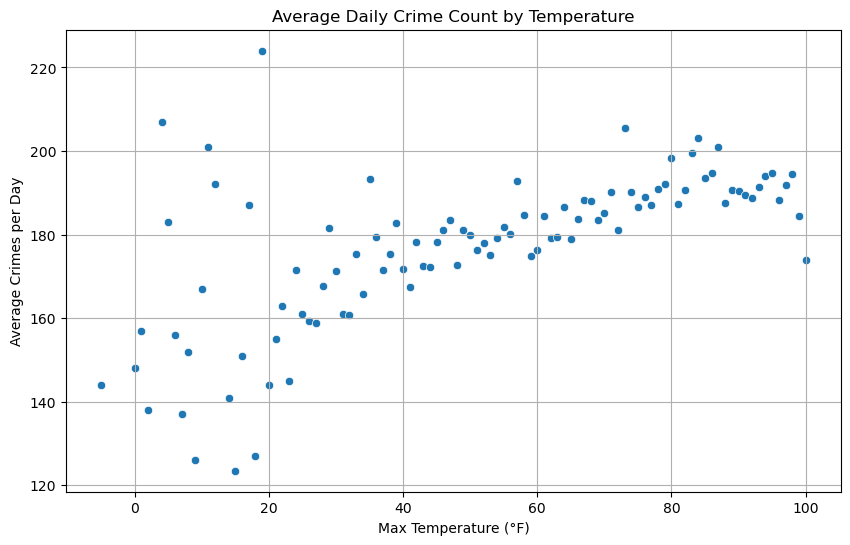

In [14]:
merged_df['TEMP_MAX_INT'] = merged_df['tempmax'].round(0)

daily_crime_counts = merged_df.groupby(['DATE', 'TEMP_MAX_INT']).size().reset_index(name='DAILY_COUNT')

avg_crimes_by_temp = daily_crime_counts.groupby('TEMP_MAX_INT')['DAILY_COUNT'].mean().reset_index(name='AVG_DAILY_CRIMES')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_crimes_by_temp, x='TEMP_MAX_INT', y='AVG_DAILY_CRIMES')
plt.title('Average Daily Crime Count by Temperature')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Average Crimes per Day')
plt.grid(True)
plt.show()

### Popular Crimes on Snow Days

In [15]:
merged_df['IS_SNOWY'] = merged_df['snow'] > 0

crime_counts = merged_df.groupby(['OFFENSE_TYPE_ID', 'IS_SNOWY']).size().unstack()
count_days = merged_df[['DATE', 'IS_SNOWY']].drop_duplicates().sort_values(by="DATE", ascending=True)

num_non_snowy_days = count_days["IS_SNOWY"].value_counts().iloc[0]
num_snowy_days = count_days["IS_SNOWY"].value_counts().iloc[1]

crime_rates = crime_counts.copy()
crime_rates[True] = crime_counts[True] / num_snowy_days
crime_rates[False] = crime_counts[False] / num_non_snowy_days

crime_rates = crime_rates.fillna(0).sort_values(by=True, ascending=False)

crime_rates["DIFFERENCE"] = crime_rates[True] - crime_rates[False]
crime_rates = crime_rates.sort_values(by="DIFFERENCE", ascending=True).reset_index()

top_differences = pd.concat([crime_rates.head(10), crime_rates.tail(5)])

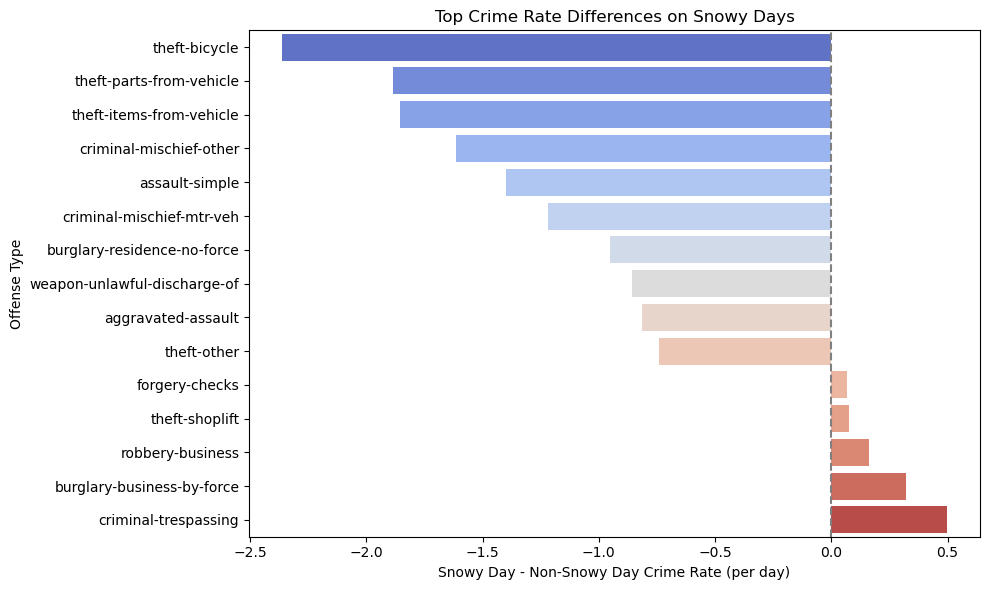

In [16]:
plt.figure(figsize=(10, 6))

sns.barplot(data=top_differences, y="OFFENSE_TYPE_ID", x="DIFFERENCE", palette="coolwarm", hue="OFFENSE_TYPE_ID")

plt.title("Top Crime Rate Differences on Snowy Days")
plt.xlabel("Snowy Day - Non-Snowy Day Crime Rate (per day)")
plt.ylabel("Offense Type")
plt.axvline(0, color='gray', linestyle='--')  # helps visually split increase vs decrease
plt.tight_layout()
plt.show()